Now that we are starting to operate on familiar "worksheet"-like data structures, let's dive into an important method of data analysis: *data visualizations*.

It is possible to write Excel charts right from Python: 

## Writing Excel charts from `xlsxwriter`

In [121]:
import pandas as pd
import xlsxwriter

# Create a DataFrame of land sizes of NYC boroughs
data = {'borough':['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],'land_area':[42.10,70.82,22.83,108.53,58.37]}

df = pd.DataFrame(data)

# Sort this DataFrame
df = df.sort_values(by=['land_area'])

df

,borough,land_area
2,Manhattan,22.83
0,The Bronx,42.10
4,Staten Island,58.37
1,Brooklyn,70.82
3,Queens,108.53


Before we can write the chart, we need to export the source data to Excel. 

Remember, we are working with a `pandas` DataFrame, so we will need to take a couple of extra steps in writing to Excel.

In [122]:
# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('nycland.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1')

# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

Were you to close your workbook now, you would see something like the below.

![DataFrame index visible in Excel export](images/nyc-land-index.png)


-  By default, our DataFrame will be written starting in `A1` of the worksheet. To write it elsewhere, check out this [`pandas` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html).  


-  The numbers in column `A` represent the ***index*** of the DataFrame. Indexes are great for hleping us access and manipulate data in `pandas`, but aren't so helpful in our finished Excel export. 


We can hide the index from displaying by including `Index = False` in our `to_excel()` method.

In [123]:
# Convert the dataframe to an XlsxWriter Excel object.
### index = 'False' ###
df.to_excel(writer, sheet_name='Sheet1', index=False)

# Get the xsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

Don't close the connection yet: we still need to add the chart! 

See Chapter 18 of the documentation. 

### Inserting Excel charts from `xlsxwriter`

We will follow a few steps to do this:

1. Add the chart with `add_chart()`.  

2. Add the series with `add_series()`  


3.  
    a.  Set a chart title with `set_title()`.  

    b.  Set an x-axis label with `set_x_axis()`. 
 
    c.  Set a y-axis label with `set_y_axis()`.  



4.  Insert the chart into the worksheet with `insert_chart()`.  

There are some other possibilities here, such as setting a chart style or a secondary series. Check [Chapter 18 of the `xlsxwriter` documentation](https://github.com/jmcnamara/XlsxWriter/blob/master/docs/XlsxWriter.pdf).


In [124]:
# 1. Add the chart with `add_chart()`
# Assign this to a variable so we can refer to it for
# subsequent steps
nyc_chart = workbook.add_chart({'type': 'bar'})

# 2. Add the series with `add_series()`
nyc_chart.add_series({
# 'name' is the name of our variable
'name': '=Sheet1!$B$1',
# 'categories' are our observation labels
'categories': '=Sheet1!$A$2:$A$6',
# 'values' are our variable values
'values': '=Sheet1!$B$2:$B$6',
})

# 3a. Set a chart title with `set_title()`
nyc_chart.set_title ({'name': 'Land area of NYC boroughs'})

# 3b. Set an x-axis label with `set_x_axis()`
nyc_chart.set_x_axis({'name': 'Borough'})

# 3c. Set a y-axis label with `set_y_axis()`
nyc_chart.set_y_axis({'name': 'Land area (square miles)'})

# 4. Insert the chart to worksheet with `insert_chart()`
worksheet.insert_chart('E1', nyc_chart)

Were you to close the workbook connection now, you would see something like the below.


![NYC boroughs with Excel chart](images/nyc-land-excel-chart.png)

### Writing Python charts to Excel

It's great to write Excel charts right from Python.

We also have the ability to use Python's rich data visualization capabilities and write the results to Excel.

Let's create the same bar chart as above, but using the popular [`matplotlib.pyplot()` data visualization module](https://matplotlib.org/api/pyplot_api.html). 

This is *not* a course on building visualizations or understanding modules in Python. 

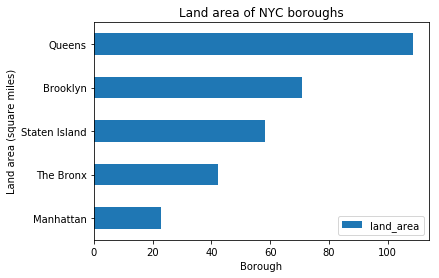

In [125]:
# Import the module
import matplotlib.pyplot as plt

# Create a bar chart
df.plot.barh(x="borough",y="land_area",title="Land area of NYC boroughs")


# Set x- and y-axis
plt.xlabel('Borough')
plt.ylabel('Land area (square miles)')


# Save the image-- we will need this for later
plt.savefig('nyc-land.png', bbox_inches='tight', dpi = (200))

# Show the bar chart in our console
plt.show()


We can't write a plot directly into `xlsxwriter`. Instead, we will save an image of the plot, and write the image using the `insert_image()` method.

In [126]:
# Add the image to the workbook
worksheet.insert_image('E17', 'nyc-land.png')

# Close the workbook and admire your creation!
workbook.close()